In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np 
import jax.numpy as jnp 
import jax
from jax import random, jit  
from scipy import linalg
import jax.scipy as jsp
from os import listdir
from os.path import isfile, join
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# list out the categories that we aim to classify and assign numerical labels
category_lst = ['unmasked', 'half_masked', 'correctly_masked']
labels = {0: category_lst[0], 1: category_lst[1], 2: category_lst[2]}
# initialize storage for training and test data
generic_svd = []
generic_svd_dd = []
jax_svd = []
jax_svd_dd = []

# for loop to read various percent of images
for s in [0.2,0.4,0.6,0.8,1]:
  directory = 'drive/MyDrive/AM 205 Project/'
  A_train_dict = {}
  A_test_dict = {}
  y_train_dict = {}
  y_test_dict = {}
  for label in labels:
    category = category_lst[label]
    file_lst =   onlyfiles = [f for f in listdir('drive/MyDrive/AM 205 Project/{}'.format(category)) if isfile(join('drive/MyDrive/AM 205 Project/{}'.format(category), f))]
    L = len(file_lst)
    d = (70*50*3)
    A_train = np.zeros((d, int(s*L)))

    y_train_dict[category] = np.array(int(s*L)*[label])

    for i in range(L):
        filename = os.fsdecode(file_lst[i])
        img = imread(directory + category + '/' + filename)
        img_resized = cv2.resize(img, (50, 70))
        if i < int(s*L):
          A_train[:, i] = img_resized.flatten()

    A_train_dict[category] = A_train
  ## Generic svd dd
  U_dict = {}
  S_dict = {}
  V_dict = {}
  start = time.time()
  for category in category_lst:
    A = A_train_dict[category]
    u, s, vt = svd(A)
    U_dict[category] = u
    S_dict[category] = s
    V_dict[category] = vt
  end = time.time()
  print('Generic svd dd time: ', end-start)
  generic_svd_dd.append(end-start)

  # Generic svd
  U_dict = {}
  S_dict = {}
  V_dict = {}
  start = time.time()
  for category in category_lst:
    A = A_train_dict[category]
    u, s, vt = linalg.svd(A, lapack_driver='gesvd')
    U_dict[category] = u
    S_dict[category] = s
    V_dict[category] = vt
  end = time.time()
  print('Generic svd time: ', end-start)
  generic_svd.append(end-start)

  # Jax svd dd
  U_dict = {}
  S_dict = {}
  V_dict = {}
  start = time.time()
  for category in category_lst:
    A = A_train_dict[category]
    u, s, vt = jax.numpy.linalg.svd(A)
    U_dict[category] = u
    S_dict[category] = s
    V_dict[category] = vt
  end = time.time()
  print('Jax svd dd time ', end-start)
  jax_svd_dd.append(end-start)

  #Jax svd 
  U_dict = {}
  S_dict = {}
  V_dict = {}
  start = time.time()
  for category in category_lst:
    A = A_train_dict[category]
    u, s, vt = jsp.linalg.svd(A, lapack_driver='gesvd')
    U_dict[category] = u
    S_dict[category] = s
    V_dict[category] = vt
  end = time.time()
  print('Jax svd time ', end-start)
  jax_svd.append(end-start)


Generic svd dd time:  7.501731634140015


Generic svd time:  7.436543941497803
Jax svd dd time  5.265674114227295
Jax svd time  4.95753026008606
Generic svd dd time:  15.35178279876709
Generic svd time:  14.906480073928833
Jax svd dd time  9.433456897735596
Jax svd time  8.051958084106445
Generic svd dd time:  21.64516854286194
Generic svd time:  25.105695009231567
Jax svd dd time  14.713233709335327
Jax svd time  15.406808614730835
Generic svd dd time:  31.114433765411377
Generic svd time:  28.361753225326538
Jax svd dd time  18.18136978149414
Jax svd time  18.70132613182068
Generic svd dd time:  35.13710308074951
Generic svd time:  35.910893201828
Jax svd dd time  23.431345224380493
Jax svd time  21.525243997573853


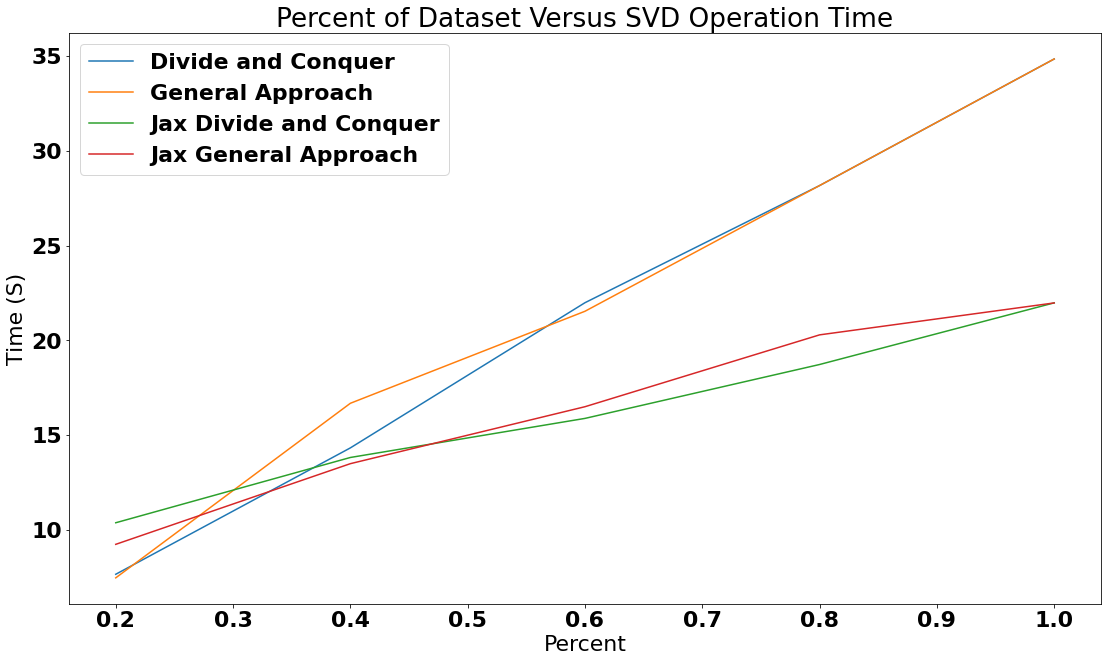

In [ ]:
tofig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
fig.set_size_inches(18.5, 10.5)


dd = generic_svd_dd
svd = generic_svd
jdd = jax_svd_dd
jsvd = jax_svd
vals = [0.2,0.4,0.6,0.8,1]
plt.plot(vals, dd, label = 'Divide and Conquer')
plt.plot(vals, svd, label = 'General Approach')
plt.plot(vals, jdd, label = 'Jax Divide and Conquer')
plt.plot(vals, jsvd, label = 'Jax General Approach')
plt.title ('Percent of Dataset Versus SVD Operation Time')
plt.xlabel('Percent')
plt.ylabel('Time (S)')
plt.legend()